In [84]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

cal_hou = datasets.fetch_california_housing()

In [85]:
import pandas as pd
df = pd.DataFrame(data=cal_hou['data'], columns=cal_hou['feature_names']) 
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Eliminamos de la lista las variables Latitud y Longitud.

In [86]:
fn_aux = cal_hou['feature_names'].copy()
fn_aux.remove('Latitude')
fn_aux.remove('Longitude')
cal_hou_fn = fn_aux.copy()
cal_hou['feature_names'] = fn_aux
data_aux = cal_hou['data'].copy()
data_aux = np.delete(data_aux,6,1)
data_aux = np.delete(data_aux,6,1)
data_cal_hou = data_aux.copy()

Eliminamos latitud y longitud.

In [48]:
df = pd.DataFrame(data=data_aux, columns=fn_aux) 
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


In [49]:
import collections
import operator
print(df['MedInc'][87])
medinc = sorted(df['MedInc'].items(), key=lambda kv: kv[1])
l = len(medinc)
print(l)
for x in range(0,l):
    a,b = medinc[x]
    medinc[x] = (x,b)
#print(medinc)
medincmap = dict(medinc)
#medincmap.values().head()

0.76
20640


In [50]:
df2 = df.copy()
df2['MedIncOrd'] = sorted(df['MedInc'].values)

In [51]:
# Definición de una función
def clasificarDF2(x):
    if x < 3:
        return 'baja'
    elif x < 7:
        return 'media'
    else:
        return 'alta'

In [52]:
from pandas.plotting import scatter_matrix

dic_colors = { 'baja': 'red', 'media': 'orange', 'alta': 'green' }
colors = df2['MedIncOrd'].map(clasificarDF2).map(dic_colors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBD494C5C0>,
      dtype=object)

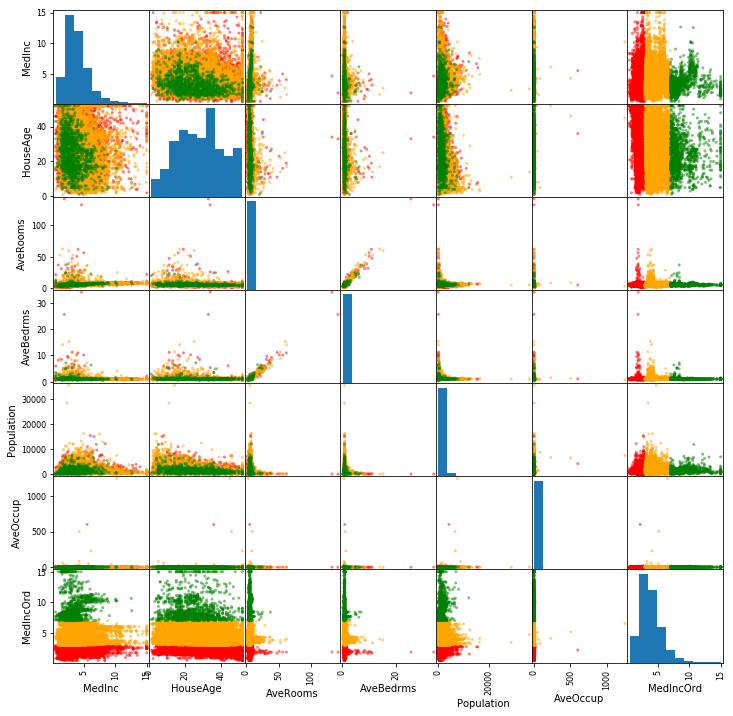

In [53]:
scatter_matrix(df2, figsize = (12, 12), diagonal = 'hist', color=colors)

In [56]:
#normalizamos los datos:

from sklearn.preprocessing import Normalizer

# Normalizamos los datos para que estén centrados en 0 y con varianza 1
scaler = Normalizer()
df_values_normal = scaler.fit_transform(df.values.copy())
df_normal = pd.DataFrame(data=df_values_normal, columns=cal_hou['feature_names']) 
df_normal.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.004889,0.037450,0.007642,0.001568,0.996317,0.003642
std,0.010754,0.063291,0.024530,0.005466,0.032200,0.007830
min,0.000072,0.000184,0.000148,0.000028,0.151008,0.000164
25%,0.001760,0.012447,0.002837,0.000610,0.999037,0.001653
50%,0.003000,0.023976,0.004438,0.000903,0.999684,0.002442
75%,0.005021,0.042432,0.006918,0.001343,0.999906,0.003571
max,0.406675,0.981552,0.939911,0.233944,1.000000,0.413359


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBAB847E48>,
      dtype=object)

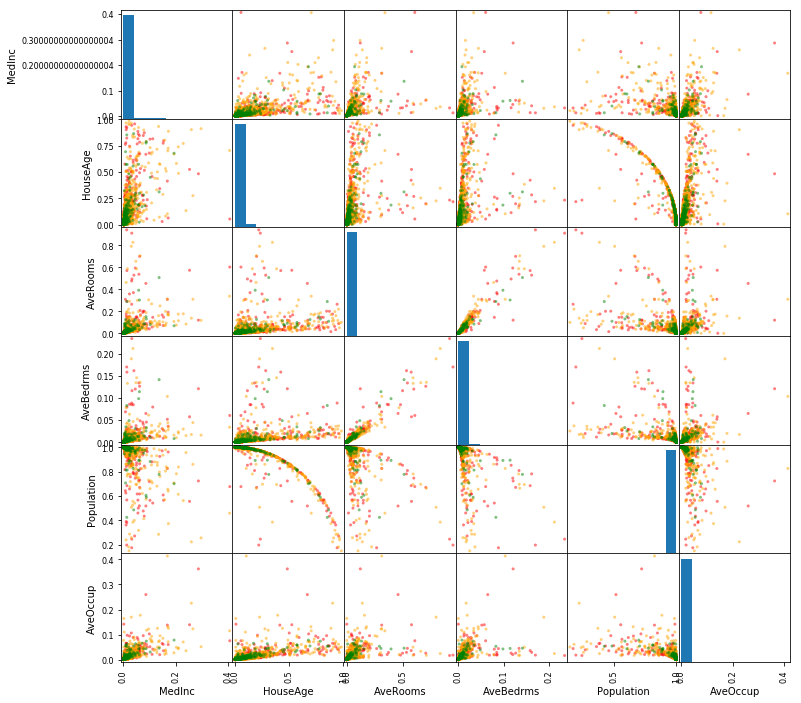

In [11]:
scatter_matrix(df_normal, figsize = (12, 12), diagonal = 'hist', color=colors)

In [12]:
df2=df.copy().loc[df.AveBedrms<15]
print(len(df2), len(df))


20637 20640


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBA87C53C8>,
      dtype=object)

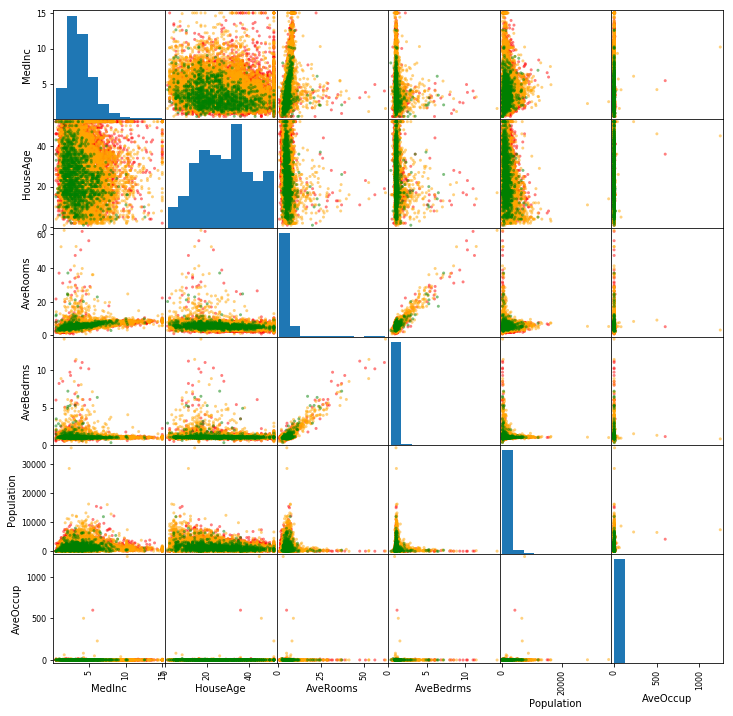

In [13]:
scatter_matrix(df2, figsize = (12, 12), diagonal = 'hist', color=colors)

In [88]:
#Como la edad de la csa y la poblacion están correlacionados, consideramos que podemos prescindir de un de estos dos datos
data_aux2 = np.delete(data_aux,3,1)
data_aux2 = np.delete(data_aux2,1,1)
fn_aux.remove('AveBedrms')
fn_aux.remove('HouseAge')
df_def = pd.DataFrame(data=data_aux2, columns=fn_aux) 
df_def.describe()

,MedInc,AveRooms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,5.429000,1425.476744,3.070655
std,1.899822,2.474173,1132.462122,10.386050
min,0.499900,0.846154,3.000000,0.692308
25%,2.563400,4.440716,787.000000,2.429741
50%,3.534800,5.229129,1166.000000,2.818116
75%,4.743250,6.052381,1725.000000,3.282261
max,15.000100,141.909091,35682.000000,1243.333333


In [92]:
# Estandarizamos los datos para que estén centrados en 0 y con varianza 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_values_std = scaler.fit_transform(df_def.values.copy())
df_std = pd.DataFrame(data=df_values_std, columns=cal_hou['feature_names']) 
df_std.describe()

,MedInc,AveRooms,Population,AveOccup
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-2.522018e-14,4.640911e-15,-7.506747e-17,-7.361326e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-1.852319e+00,-1.256123e+00,-2.290000e-01
25%,-6.881186e-01,-3.994496e-01,-5.638089e-01,-6.171062e-02
50%,-1.767951e-01,-8.078489e-02,-2.291318e-01,-2.431585e-02
75%,4.593063e-01,2.519615e-01,2.644949e-01,2.037453e-02
max,5.858286e+00,5.516324e+01,3.025033e+01,1.194191e+02


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBD7C12630>,
      dtype=object)

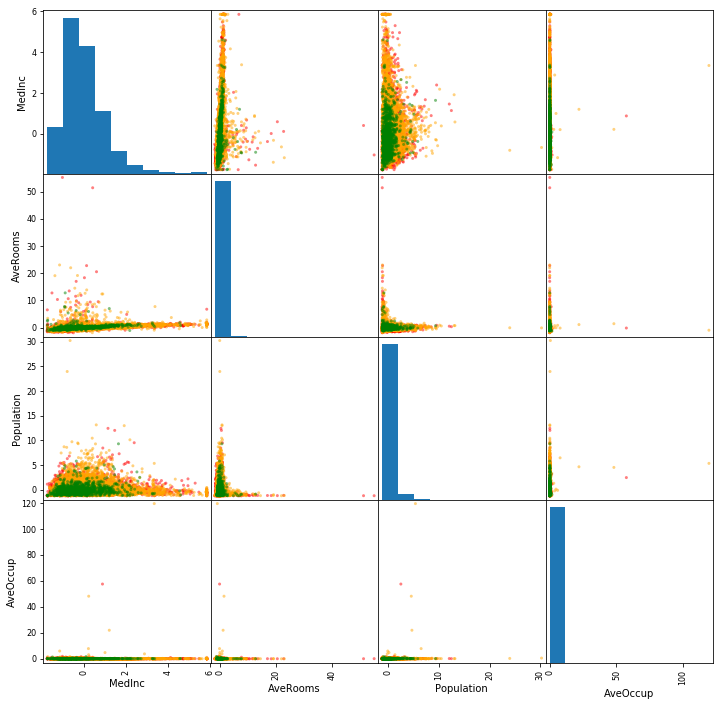

In [90]:
scatter_matrix(df_std, figsize = (12, 12), diagonal = 'hist', color=colors)

In [93]:
scaler_Normal = Normalizer()
df_values_normal = scaler_Normal.fit_transform(df_def.values.copy())
df_normal = pd.DataFrame(data=df_values_normal, columns=cal_hou['feature_names']) 
df_normal.describe()

,MedInc,AveRooms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.005155,0.008110,0.999261,0.003863
std,0.014652,0.029210,0.013795,0.010608
min,0.000072,0.000148,0.206778,0.000164
25%,0.001761,0.002837,0.999955,0.001653
50%,0.003002,0.004439,0.999982,0.002445
75%,0.005027,0.006924,0.999992,0.003571
max,0.717747,0.978122,1.000000,0.519169


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBE8ABB080>,
      dtype=object)

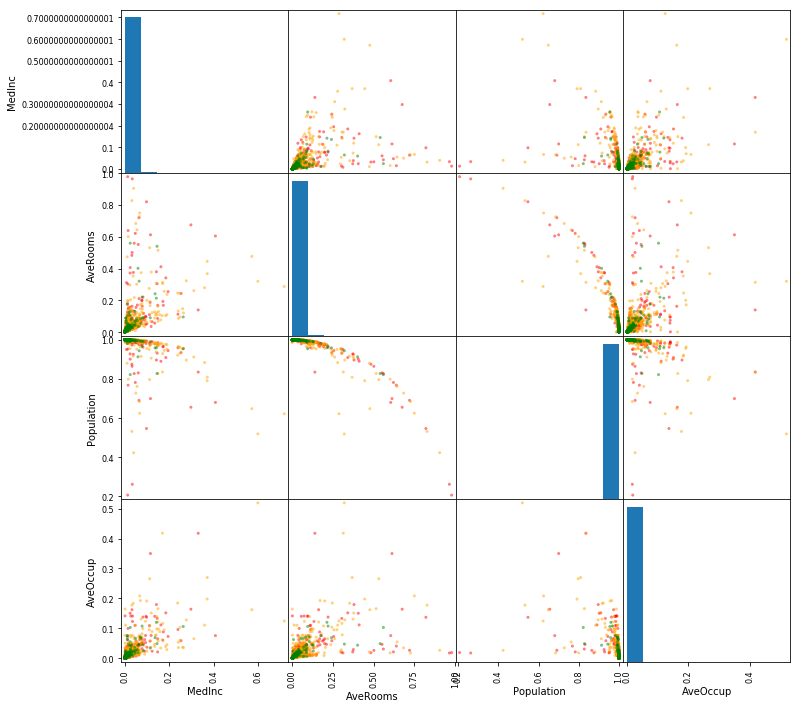

In [78]:
scatter_matrix(df_normal, figsize = (12, 12), diagonal = 'hist', color=colors)

### Aplica el algoritmo de clustering k-medias y determina el número de clusters que consideras adecuado para el conjunto de datos, justificando tu elección. 

In [18]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
import numpy as np

np.random.seed(7)

Importamos las liberías necesarias para realizar el algorimo _k-means_ y forzamos a que el random_state sea $0$ en ambos casos para que la ejecución, aunque aleatoría, siempre sea la misma (de esa manera si se ejectua de nuevo los resultados obtenidos son discutibles con el mismo razonamiento).

Text(0.5,1,'Valor de silueta para diferentes k')

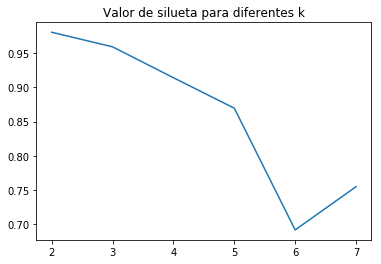

In [19]:
K_MAX = 8
silueta_normal = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km1 = KMeans(init='random', n_clusters=k,random_state=0)
    km1.fit(df_normal)
    #plot_clusters(X, km.labels_, km.cluster_centers_)
    
    silueta_normal[k-2] = silhouette_score(df_normal, km1.labels_) 
plt.plot(range(2, K_MAX), silueta_normal)
plt.title('Valor de silueta para diferentes k')

Text(0,0.5,'Valor de silueta')

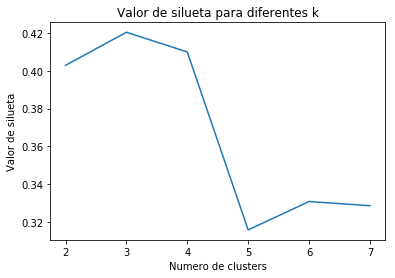

In [20]:
K_MAX = 8
silueta_std = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km2 = KMeans(init='random', n_clusters=k,random_state=0)
    km2.fit(df_std)
    #plot_clusters(X, km.labels_, km.cluster_centers_)
    
    silueta_std[k-2] = silhouette_score(df_std, km2.labels_) 
plt.plot(range(2, K_MAX), silueta_std)
plt.title('Valor de silueta para diferentes k')
plt.xlabel('Numero de clusters')
plt.ylabel('Valor de silueta')

De la ejecución del algoritmo deducimos que si los datos están normalizados, haciendo dos clusters los datos están bien agrupados, mas si estan estandarizados, nuestro algorimo determina hasta tres clusters distintos. Esta constante es elegida al ser aquella que máximiza la función del valor de silueta en cada caso.

In [31]:
km_normal = KMeans(init='random', n_clusters=2)

# Agrupar los puntos en clusters
km_normal.fit(df_normal)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels_normal = km_normal.labels_
centers_normal = km_normal.cluster_centers_

In [22]:
km_std = KMeans(init='random', n_clusters=3)

# Agrupar los puntos en clusters
km_std.fit(df_std)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels_std = km_std.labels_
centers_std = km_std.cluster_centers_

### Pinta los clusters en un gráfico de dispersión en función de dos de las variables de entrada que consideres interesantes. ¿Ves que considerando solamente esas dos variables se diferencien bien algunos de los clusters? ¿Cuáles? Por el contrario, ¿cuáles se confuden más? 

Una vez realizado el _k-means_, representaremos en diversas _scattermatrix_ los resultados obtenidos.

In [82]:
dic_colors_normal = { 0: 'darkorange', 1: 'rebeccapurple'}
df_normal['grupo']=labels_normal
colors_normal=df_normal['grupo'].map(dic_colors_normal)
df_normal = df_normal.drop(['grupo'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBD2416A20>,
      dtype=object)

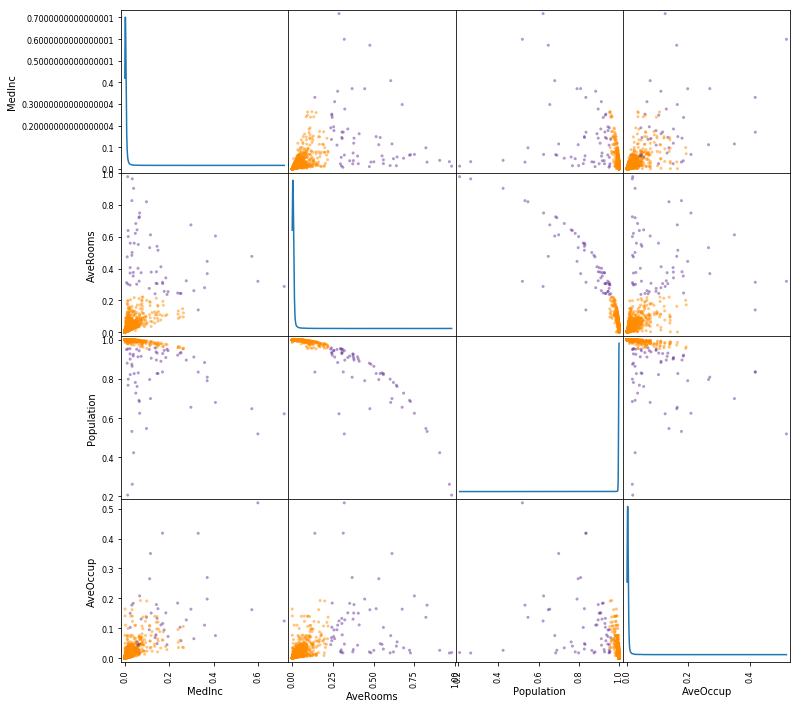

In [81]:
scatter_matrix(df_normal, figsize = (12, 12), diagonal = 'kde', color=colors_normal)

Como se puede ver en la matriz, los dos clusters no tienen el mismo número de representantes. Uno, el morado, tiene una gran cantidad de individuos, todos ellos concentrados en las zonas inferiores de las celdas a estudiar.

Por ejemplo, si consideramos las variables _ocupación media_ frente a _ingresos medio_ o _número de habitaciones_ es claro que el cluster naranja está muy concentrado en zonas de ocupación baja frente al cluster morado.

Destacamos que, en general, los clusters están bien diferenciados unos de los otros.

In [70]:
dic_colors_std = { 0: 'lawngreen', 1: 'dodgerblue', 2: 'coral'}
df_std['grupo']=labels_std
colors_std=df_std['grupo'].map(dic_colors_std)
df_std = df_std.drop(['grupo'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBE4DFB5F8>,
      dtype=object)

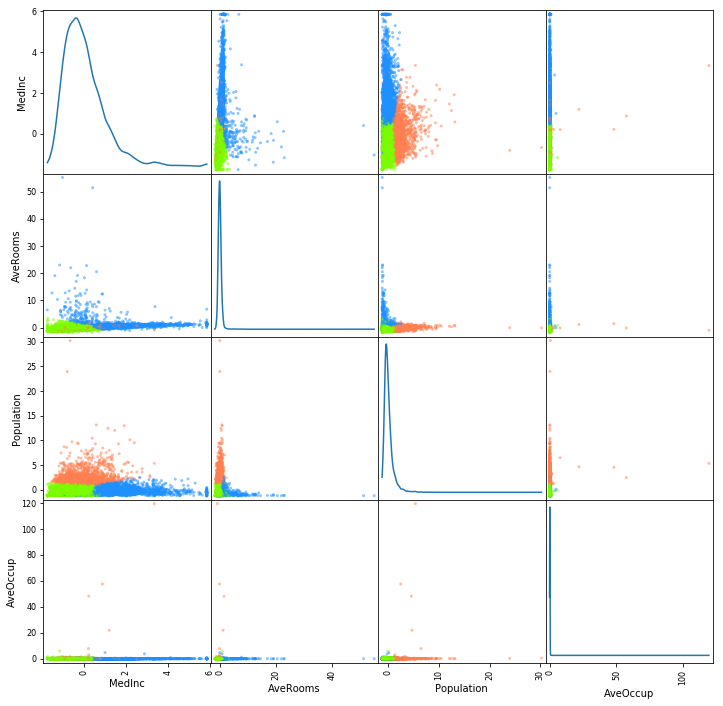

In [72]:
scatter_matrix(df_std, figsize = (12, 12), diagonal = 'kde', color=colors_std)

En este caso los clusters no están tan bien diferenciados.

Por una parte destacamos que a simple vista parece que el número de individuos está bastante equilibrado.

Por otra, si confrontamos las variables _ingreso medio_ frente a _población_, vemos que cada cluster está bein delimitado, así como en la gran mayoría de casos.

Sin embargo no es así en el caso del _ingreso medio_ frente al _número de habitaciones_ o en cualquier comparación relacionado con la _ocupación media_, ya que en todos esos casos, detectamos que al menos uno de los tres clusters queda absorbido dentro del otro. 

### Trata de averiguar qué representa cada uno de los clusters que has obtenido. Si en el apartado anterior has obtenido más de 5 clusters, basta con que comentes los dos más numerosos y los dos menos numerosos. ¿Qué valores toman las variables en cada cluster? Puedes usar estadísticos descriptivos.

In [106]:
df_sinEscalar_Normal=pd.DataFrame(data=data_cal_hou, columns=cal_hou_fn) 
df_sinEscalar_Normal['grupo']=labels_normal
colors_sinEscalar_normal=df_sinEscalar_Normal['grupo'].map(dic_colors_normal)
df_sinEscalar_Normal = df_sinEscalar_Normal.drop(['grupo'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC03319198>,
      dtype=object)

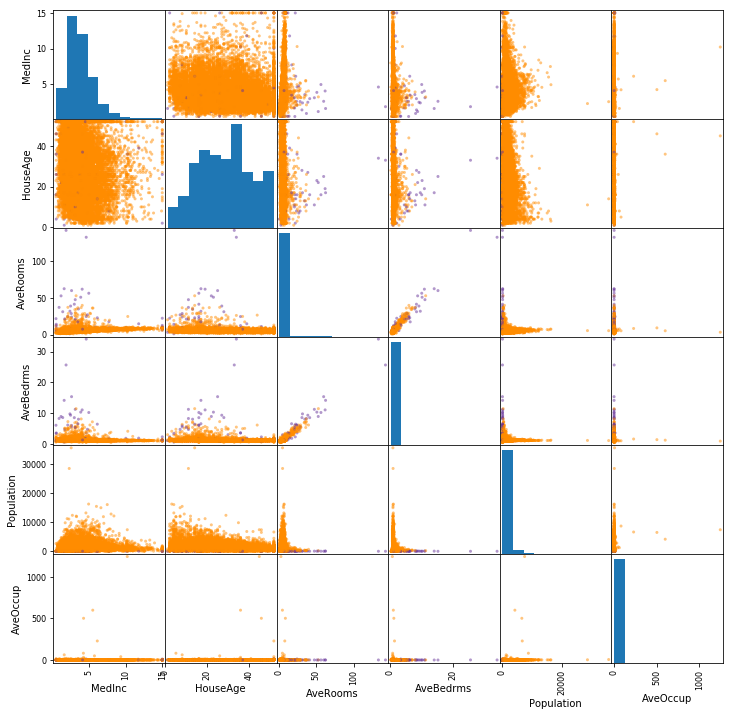

In [107]:
scatter_matrix(df_sinEscalar_Normal, figsize = (12, 12), diagonal = 'hist', color=colors_sinEscalar_normal)

En este caso, sin embargo, nos es dificil distinguir que ha sido el criterio de separacion de clusters, aunque podría ser casas grandes frente al resto de casas. Parece un agrupamiento peregrino y suponemos que si un cliente nos pidiera estos datos nos tocaría cambiar de método.

Los valores que toman, excepto en la partición propuesta, son todos los del dominio, no hay ningún tipo de criterio.

In [109]:
df_sinEscalar_std=pd.DataFrame(data=data_cal_hou, columns=cal_hou_fn) 
df_sinEscalar_std['grupo']=labels_std
colors_sinEscalar_std=df_sinEscalar_std['grupo'].map(dic_colors_std)
df_sinEscalar_std = df_sinEscalar_std.drop(['grupo'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC0C7F67F0>,
      dtype=object)

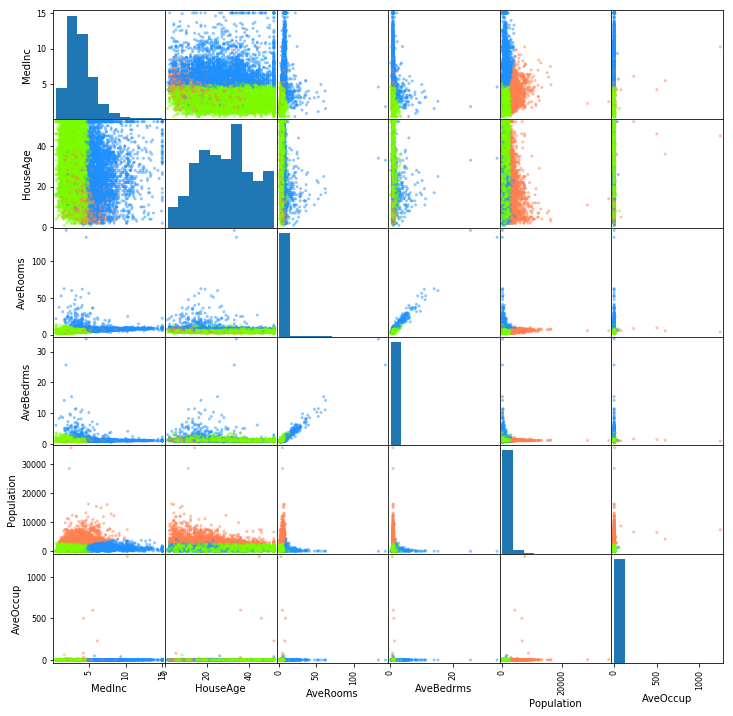

In [110]:
scatter_matrix(df_sinEscalar_std, figsize = (12, 12), diagonal = 'hist', color=colors_sinEscalar_std)

En este caso parece que las respuestas obtenidas tienen más sentido. Estudiando de nuevo el _ingreso medio_ frente a la _población_, observamos que el cluster verde representa a las personas del medio rural de ingresos bajos, el azul a las personas del medio rural de clase medio-alta y alta y el cluster rojo a aquellas personas que viven en poblaciones de media y alta densidad.

En este caso, las personas de baja renta tienen casas de menor número de habitaciones, al igual que los de las grandes ciudades ya que el espacio en estas es muy limitado.

